## IST 718 BDA Final  Project


# Russian Troll Tweets Analysis
**Identifying Russian Troll Accounts on Twitter**

**Team 1**
* Adil Gokturk
* Drew Howell
* Scott Snow


## Story &  Hypothesis 


 According to the House Intelligence Committee investigation the, Russia’s Internet Research Agency attempted to interfere with the 2016 U.S. election by running fake accounts on Twitter, know as “Russian trolls”.

* Would it be possible to demonstrate whether these tweets used to manipulate/target the 2016 U.S. election to favor on any presidential candidate?

* Would it be possible by developing machine learning models to predict whether a Twitter account is a Russian troll/fake?

##  Exploratory analysis 

**Load the Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import numpy as np
%matplotlib inline  
%pylab inline
import re
re.compile('<title>(.*)</title>') # regular expression

import seaborn as sns





Populating the interactive namespace from numpy and matplotlib


**Read the Data Set, "tweets.csv"**

In [2]:
tweets = pd.read_csv('tweets.csv')
print(tweets.shape)
tweets.head(2)

df = pd.read_csv("https://raw.githubusercontent.com/ssnow5516/my_files/master/edtwts0.csv")
srt_url = "https://raw.githubusercontent.com/ssnow5516/my_files/master/edtwts"
for i in np.arange(1,9,1):
    this_gts = pd.read_csv(srt_url + str(i) + ".csv")
    df = pd.concat([df, this_gts])



(203482, 16)


Let's check the missing values in the df

In [3]:
tweets.isnull().sum().sort_values(ascending = False)

in_reply_to_status_id    202923
retweeted_status_id      163831
favorite_count           145399
retweeted                145399
retweet_count            145399
source                   145398
user_id                    8065
tweet_id                   2314
text                         21
created_str                  21
created_at                   21
mentions                      0
posted                        0
expanded_urls                 0
hashtags                      0
user_key                      0
dtype: int64

There are 21 NaNs in the text.

Let's drop the NaNs in the text colum

In [0]:
tweets.dropna(subset=['text'], inplace=True)

Let's check the data types of the columns and convert  "created string" to "datetime"

In [5]:
print(tweets.dtypes)

user_id                  float64
user_key                  object
created_at               float64
created_str               object
retweet_count            float64
retweeted                 object
favorite_count           float64
text                      object
tweet_id                 float64
source                    object
hashtags                  object
expanded_urls             object
posted                    object
mentions                  object
retweeted_status_id      float64
in_reply_to_status_id    float64
dtype: object


Convert created_str to datetime format

In [0]:
tweets['created_str'] = pd.to_datetime(tweets['created_str'])

Convert ids to object datatype

In [0]:
columns = ['user_id', 'tweet_id', 'retweeted_status_id', 
           'retweeted_status_id', 'in_reply_to_status_id']

for column in columns :
  tweets[column] = tweets[column].astype('object')

In [8]:
# check the data types again
tweets.dtypes

user_id                          object
user_key                         object
created_at                      float64
created_str              datetime64[ns]
retweet_count                   float64
retweeted                        object
favorite_count                  float64
text                             object
tweet_id                         object
source                           object
hashtags                         object
expanded_urls                    object
posted                           object
mentions                         object
retweeted_status_id              object
in_reply_to_status_id            object
dtype: object

**Check the period of the tweets**

In [9]:
start_date_tweet = tweets['created_str'].min()
end_date_tweet = tweets['created_str'].max()

print(start_date_tweet, end_date_tweet)

2014-07-14 18:04:55 2017-09-26 09:05:32


The data sets have   about 3 years of tweets starting 14th July 2014 until the 26th of September 2017.

Times appear with these dates, so let's create a new column to hold only the date component of this.

In [0]:
tweets['created_str_date'] = pd.to_datetime(tweets['created_str'].dt.date)

Let' s take a look at the trend of these tweets against time

In [0]:
# Count the number of times a date appears in the dataset and convert to dataframe
tweet_trend = pd.DataFrame(tweets['created_str_date'].value_counts())


In [0]:
# index is date, columns indicate tweet count on that day
tweet_trend.columns = ['tweet_count']

In [0]:
# sort the dataframe by the dates to have them in order
tweet_trend.sort_index(ascending = True, inplace = True)

Text(0, 0.5, 'Tweet Count')

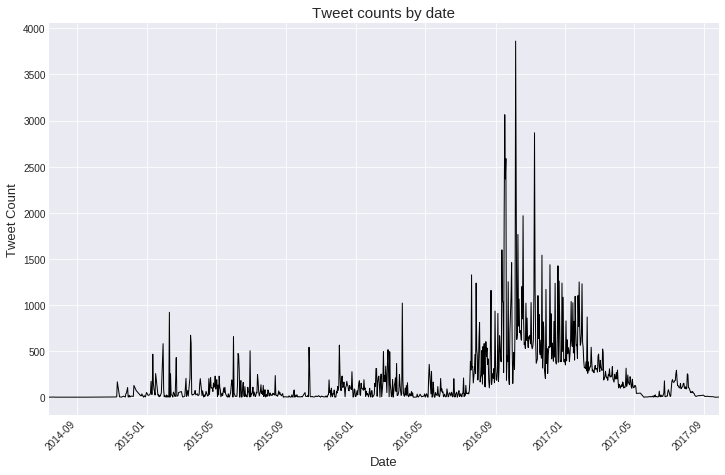

In [14]:
#make a line plot of the tweet count data and give some pretty labels! ;)
# the 'rot' argument control x-axis ticks rotation
plt.style.use('seaborn-darkgrid')
tweet_trend['tweet_count'].plot(linestyle = "-", figsize = (12,8), rot = 45, color = 'k',
                               linewidth = 1)
plt.title('Tweet counts by date', fontsize = 15)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Tweet Count', fontsize = 13)



If these tweets really had to impact the way of the US presidential elections, these tweets would be most numerous during important parts of the trump rally or milestones in the trump rally. 

Let's get these dates online and try to map that data on with the line plot!

In [0]:
# these are dates corresponding to important dates from the trump campaign.
dates_list = ['2015-06-16', '2015-12-07', '2016-02-01',
              '2016-03-01', '2016-03-03', '2016-03-11',
              '2016-05-03', '2016-05-26', '2016-06-20', 
              '2016-07-15', '2016-07-21', '2016-08-17',
              '2016-09-01', '2016-10-07', '2016-11-08']

# create a series of these dates.
important_dates = pd.Series(pd.to_datetime(dates_list))

# add columns to identify important events, and mark a 0 or 1.
tweet_trend['Important Events'] = False
tweet_trend.loc[important_dates, 'Important Events'] = True
tweet_trend['values'] = 0
tweet_trend.loc[important_dates, 'values'] = 1

Let's plot the line chart for trend, a monthly average of tweet counts and add red dots to mark important events.

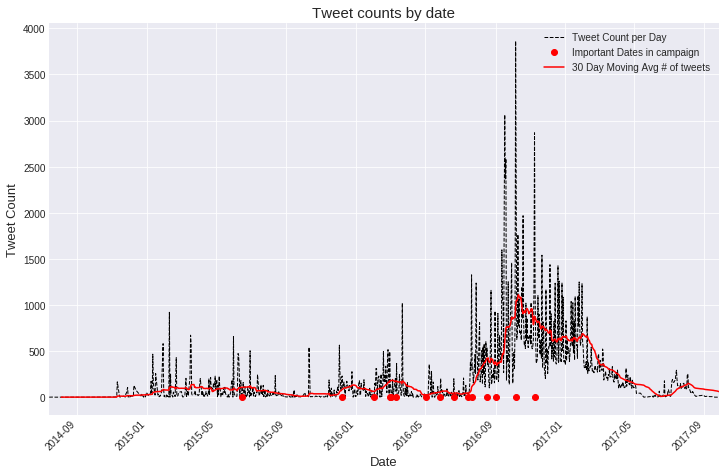

In [16]:
plt.style.use('seaborn-darkgrid')
tweet_trend['tweet_count'].plot(linestyle = "--", 
                                figsize = (12,8), rot = 45, 
                                color = 'k',
                                label = 'Tweet Count per Day',
                               linewidth = 1)

# plot dots for where values in the tweet_trend df are 1
plt.plot(tweet_trend[tweet_trend['Important Events'] == True].index.values,
         tweet_trend.loc[tweet_trend['Important Events'] == True, 'values'],
         marker = 'o', 
         color = 'r',
         linestyle = 'none',
        label = 'Important Dates in campaign')

# Lets add a 30 day moving average on top to view the trend! Min_periods tells rolling() to
# use 10 points if 30 not available!
plt.plot(tweet_trend['tweet_count'].rolling(window = 30, min_periods = 10).mean(), 
         color = 'r', 
         label = '30 Day Moving Avg # of tweets')
plt.title('Tweet counts by date', fontsize = 15)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Tweet Count', fontsize = 13)
plt.legend(loc = 'best')

### The US president was elected on 8th November 2016 - the last red dot on the chart. 

### The tweet activity near the end of the campaign was  increased.

### Let's  Calculate the percentage change in Tweets counts

In [17]:
tweet_trend['Pct_Chg_tweets'] = tweet_trend['tweet_count'].pct_change()*100

# Lets see values only for the important dates. This Pct_Chg_tweets shows us the percentage
# change in tweets for the day of the event versus the previous day!
tweet_trend.loc[tweet_trend['values'] == 1,['tweet_count', 'Pct_Chg_tweets']]

,tweet_count,Pct_Chg_tweets
2015-06-16,3,50.000000
2015-12-07,219,204.166667
2016-02-01,18,1700.000000
2016-03-01,143,-71.052632
2016-03-03,6,-92.105263
2016-03-11,64,-69.523810
2016-05-03,38,216.666667
2016-05-26,6,-50.000000
2016-06-20,201,1156.250000
2016-07-15,47,17.500000


Evidently, for most of the dates related to the Trump campaign, **there is an increasing trend in the tweet counts,** sometimes as large as 1700%. 

Let's plot the percentage change 




Text(0, 0.5, 'Tweet Counts  Change')

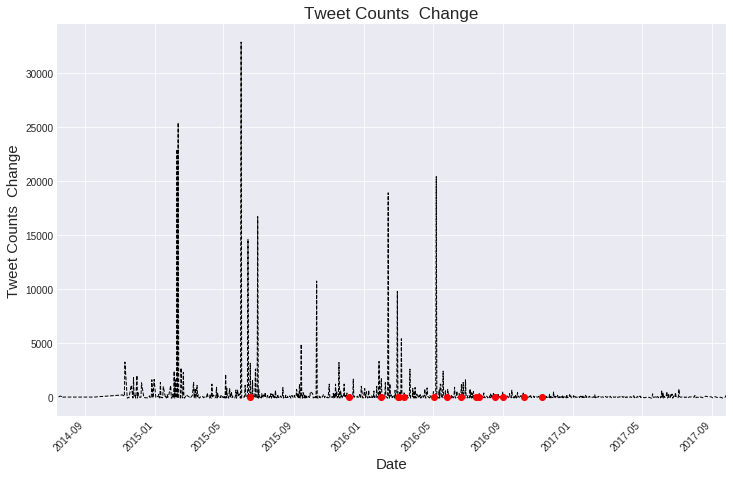

In [18]:
# line plot of the % change in tweets counts
tweet_trend['Pct_Chg_tweets'].plot(linestyle = "--",
                                   figsize = (12, 8), rot = 45,
                                  color = 'k',
                                  linewidth = 1)

# Let's add the dots for important events
plt.plot(tweet_trend[tweet_trend['Important Events'] == True].index.values,
        tweet_trend.loc[tweet_trend['Important Events'] == True, 'values'],
        marker = 'o',
        color = 'r',
        linestyle = 'none')
plt.title('Tweet Counts  Change', fontsize = 17)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Tweet Counts  Change', fontsize = 15)

### Text Analytics

Tweets data set contains some  additional features such as  RT mentions, links, hastags etc. 

Let's seperate our these features to analyze just the tweet text or hastags

In [19]:
# text column features
tweets['text'].head(10)

0    #IslamKills Are you trying to say that there w...
1    Clinton: Trump should’ve apologized more, atta...
2    RT @ltapoll: Who was/is the best president of ...
3    RT @jww372: I don't have to guess your religio...
4    RT @Shareblue: Pence and his lawyers decided w...
5                               @ModicaGiunta me, too!
6    RT @MDBlanchfield: You’ll never guess who twee...
7    RT @100PercFEDUP: New post: WATCH: DIAMOND AND...
8    RT @AriaWilsonGOP: 3 Women Face Charges After ...
9    One of the ways to remind that #BlackLivesMatt...
Name: text, dtype: object

Apparently; 
* Retweets begin with the keyword 'RT'. These are followed by @userkey.
* Hashtags begin with a # and are one continuous string with a space next to them
* Links begin with https:// or http:// and can be present anywhere in the string.
* User mentions begin with '@' 


**Let's remove the RT mentions from tweets** by creating a function.


In [0]:
def remove_retweet(tweet):
  just_text = []
  if len(re.findall("^RT.*?:(.*)", tweet)) > 0:
    just_text.append(re.findall("^RT.*?:(.*)", tweet)[0])
  else:
    just_text.append(tweet)
  return just_text[0]



    

Extract texts and place in a list

In [0]:
just_text = tweets['text'].map(remove_retweet)

**Remove the links form the tweets**

In [0]:
def remove_links(tweet):
  just_text = []
  if len (re.findall("(https://[^\s]+)", tweet)) > 0:
    tweet = re.sub("(https://[^\s]+)","", tweet)
  if len(re.findall("(https://[^\s]+)", tweet)) > 0:
    tweet = re.sub("(https://[^\s]+)", "", tweet)
  just_text.append(tweet)
  return just_text[0]

text_no_links = just_text.map(remove_links)

**Remove the Hashtags**

In [0]:
def remove_hashtags(tweet):
    hashtags_only = []
    if len(re.findall("(#[^#\s]+)", tweet)) > 0:
        tweet = re.sub("(#[^#\s]+)", "", tweet) 
    hashtags_only.append(tweet)
    return hashtags_only[0]

text_all_removed = text_no_links.map(remove_hashtags)

Remove all extra spaces

In [0]:
def remove_extraneous(tweet):
    tweet = tweet.rstrip()
    tweet = tweet.lstrip()
    tweet = tweet.rstrip(")")
    tweet = tweet.lstrip("(")
    tweet = re.sub("\.", "", tweet)
    return tweet

text_clean = text_all_removed.map(remove_extraneous)
                      

Let's remove the user mentions from the cleaned text

In [0]:
def extract_mentions(tweet):
    mentions = []
    if len(re.findall('@[^\s@]+', tweet))>0:
        mentions.append(re.findall('@([^\s@]+)', tweet))
    else:
        mentions.append(["0"])
    return mentions[0]
 
# Add to user mentions in a new column in df 
tweets['user_mentions'] = text_clean.map(extract_mentions)

 

In [0]:
# Remove the mentions form the text

def remove_mentions(tweet):
    mentions = []
    if len(re.findall('@[^\s@]+', tweet))>0:
        tweet = re.sub('@[^\s@]+', "" , tweet)
        mentions.append(tweet)
    else:
        mentions.append(tweet)
    return mentions[0]

text_clean_final = text_clean.map(remove_mentions)

Let's append the new clean text list to df

In [0]:
tweets['tweet_text_only'] = text_clean_final

### The most used hastags list 

In [0]:
def extract_hashtags(tweet):
    hashtags_only = []
    if len(re.findall("(#[^#\s]+)", tweet)) > 0:
        hashtags_only.append(re.findall("(#[^#\s]+)", tweet))
    else:
        hashtags_only.append(["0"])
    return hashtags_only[0]

In [29]:
# let's add to the df and view the first 10
tweets['tweet_hashtags'] = tweets['text'].map(extract_hashtags)
tweets['tweet_hashtags'].head(10)

0                          [#IslamKills]
1                                    [0]
2                                    [0]
3                  [#ChristmasAftermath]
4                                    [0]
5                                    [0]
6                                    [0]
7                                    [0]
8                                    [0]
9    [#BlackLivesMatter, #BlackPressDay]
Name: tweet_hashtags, dtype: object

Create a list of Hashtags

In [0]:
all_hashtags = tweets['tweet_hashtags'].tolist()

cleaned_hashtags = []
for i in all_hashtags:
  for j in i:
    cleaned_hashtags.append(j)

# convert cleaned to a series to count the most frequently accuring
cleaned_hashtag_series = pd.Series(cleaned_hashtags)
hashtag_counts = cleaned_hashtag_series.value_counts()

Let's create a **Word Cloud** to visualize the most commonly used hashtags.

let's put the word list as a single string separated by spaces, first.

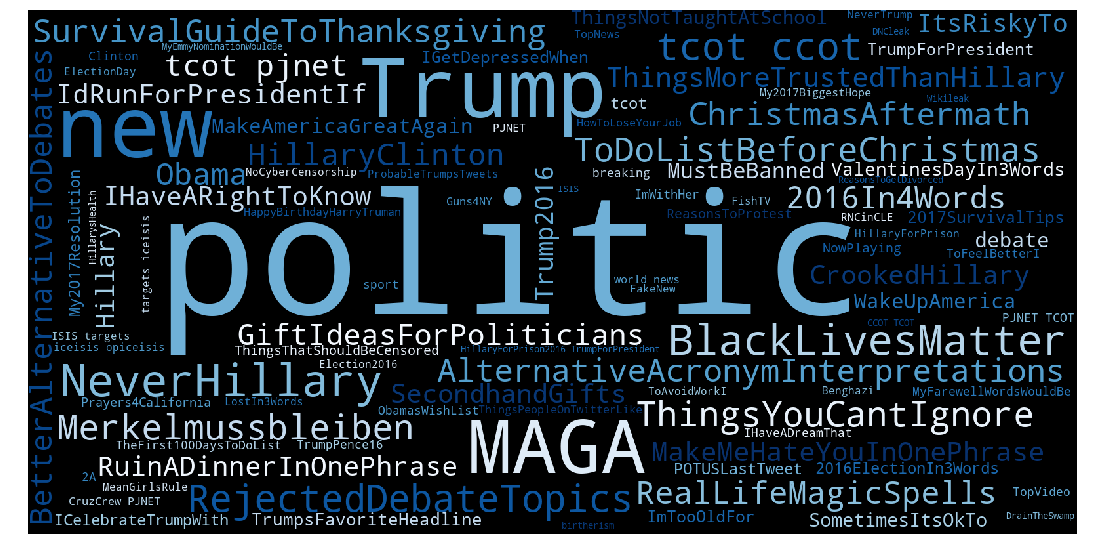

In [31]:
hashes = cleaned_hashtag_series.values
hashes = hashes.tolist()

# convert list to one string with all the words
hashes_words = " ".join(hashes)

# generate the wordcloud. 
from wordcloud import WordCloud
wordcloud = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Blues",
                     max_words = 100).generate(hashes_words)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# **Top 20 Hashtags used in Troll tweets**

Text(0, 0.5, 'Hashtags')

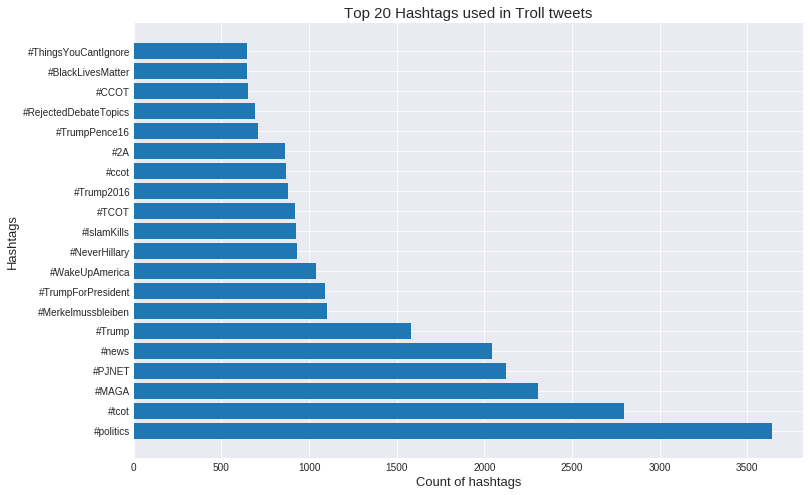

In [32]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (12,8))
plt.barh(y = hashtag_counts[1:21].index.values, width = hashtag_counts[1:21])
plt.title("Top 20 Hashtags used in Troll tweets", fontsize = 15)
plt.xlabel('Count of hashtags', fontsize = 13)
plt.ylabel('Hashtags', fontsize = 13)

The most common hashtags:



1.   #POLITICS
2.   #TCOT
3.   #MAGA
4.   #PJNET
5.   #news
6.   #Trump

Apparenty, the trolls highly interted to the current president's campaign.


### Were these hashtags used most before the president's campaign?

Let's use the top 6 hashtags and a count of how many times these were used on the dates provided in the created_str_date.








In [33]:
# Create a new df by using the date and the hashtags on that date
hashtag_date_df = tweets[['created_str_date','tweet_hashtags']]
hashtag_date_df = hashtag_date_df.reset_index(drop=True)

# extract a list of hashtags from the df
all_hashtags = hashtag_date_df['tweet_hashtags'].tolist()

hashtag_date_df.head(10)



,created_str_date,tweet_hashtags
0,2016-03-22,[#IslamKills]
1,2016-10-10,[0]
2,2017-02-22,[0]
3,2016-12-26,[#ChristmasAftermath]
4,2017-08-06,[0]
5,2016-10-26,[0]
6,2017-03-07,[0]
7,2016-12-30,[0]
8,2016-10-30,[0]
9,2016-03-16,"[#BlackLivesMatter, #BlackPressDay]"


 For the top 6 hashtags, lets calculate how many times that appears against each date

In [0]:
count_dict = {}
for i in hashtag_counts.index.values[1:7]:
  count_hash = []
  for j in all_hashtags:
    count_hash.append(j.count(i))
  count_dict[i] = count_hash

Create a hashtag data frame


In [0]:
hashtag_count_df = pd.DataFrame(count_dict)

# concatebate the new df with the hashtag_count_df
hashtag_count_df = pd.concat([hashtag_date_df, hashtag_count_df], axis=1)

In [36]:
hashtag_count_df.head(10)

,created_str_date,tweet_hashtags,#politics,#tcot,#MAGA,#PJNET,#news,#Trump
0,2016-03-22,[#IslamKills],0,0,0,0,0,0
1,2016-10-10,[0],0,0,0,0,0,0
2,2017-02-22,[0],0,0,0,0,0,0
3,2016-12-26,[#ChristmasAftermath],0,0,0,0,0,0
4,2017-08-06,[0],0,0,0,0,0,0
5,2016-10-26,[0],0,0,0,0,0,0
6,2017-03-07,[0],0,0,0,0,0,0
7,2016-12-30,[0],0,0,0,0,0,0
8,2016-10-30,[0],0,0,0,0,0,0
9,2016-03-16,"[#BlackLivesMatter, #BlackPressDay]",0,0,0,0,0,0


### Let's summarize the data to see monthly usage of the most common hashtags

In [37]:
# change the created_str column into datetime format and extract just the date from it
hashtag_count_df['created_str_date'] = pd.to_datetime(hashtag_count_df['created_str_date'])

# set the index so as to plot the time series
hashtag_count_df.set_index('created_str_date', inplace = True)

# get a monthly sum of the tweets for each of these hashtags
hashtag_count_df_pivot = hashtag_count_df.resample('M').sum()

# replace 0 with NaN so that these can be removed in rows where they are all NaNs
hashtag_count_df_pivot.replace(0, np.nan, inplace = True)
hashtag_count_df_pivot.dropna(how = 'all', inplace = True, axis = 0)

# replace NaNs back by 0s so that we can plot
hashtag_count_df_pivot.replace(np.nan, 0, inplace = True)
hashtag_count_df_pivot

,#politics,#tcot,#MAGA,#PJNET,#news,#Trump
created_str_date,,,,,,
2015-02-28,2.0,0.0,0.0,0.0,2.0,0.0
2015-03-31,1.0,0.0,0.0,0.0,9.0,0.0
2015-04-30,45.0,4.0,0.0,2.0,149.0,0.0
2015-05-31,41.0,30.0,0.0,64.0,163.0,0.0
2015-06-30,26.0,61.0,0.0,17.0,124.0,0.0
2015-07-31,59.0,13.0,0.0,3.0,307.0,2.0
2015-08-31,3.0,1.0,0.0,1.0,9.0,24.0
2015-09-30,0.0,0.0,0.0,0.0,1.0,0.0
2015-10-31,20.0,34.0,0.0,11.0,1.0,6.0


Let's plot the montly usage of the most common hashtags

Text(0.5, 0, 'Date')

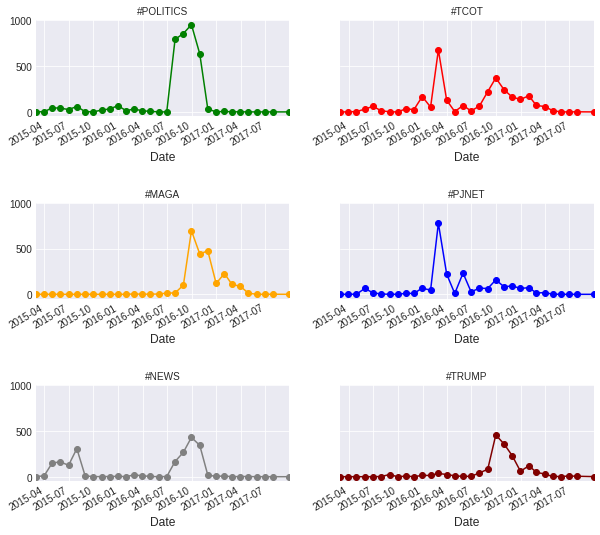

In [38]:
plt.style.use('seaborn-darkgrid')
# create a 3 by 2 subplot to hold the trend of all hashtags
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = subplots(nrows = 3,
                                                       ncols = 2,
                                                       sharey = True,
                                                       figsize = (10,8))

plt.subplots_adjust(top = 1, hspace = 0.9)
hashtag_count_df_pivot['#politics'].plot(linestyle = "-", marker = "o", color = "green",ax = ax1)
ax1.set_title("#POLITICS", fontsize = 10)
ax1.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#tcot'].plot(linestyle = "-", marker = "o", color = "red", ax = ax2)
ax2.set_title("#TCOT", fontsize = 10)
ax2.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#MAGA'].plot(linestyle = "-", marker = "o", color = "orange", ax = ax3)
ax3.set_title("#MAGA", fontsize = 10)
ax3.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#PJNET'].plot(linestyle = "-", marker = "o", color = "blue",ax = ax4)
ax4.set_title("#PJNET", fontsize = 10)
ax4.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#news'].plot(linestyle = "-", marker = "o", color = "grey", ax = ax5)
ax5.set_title("#NEWS", fontsize = 10)
ax5.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#Trump'].plot(linestyle = "-", marker = "o", color = "maroon", ax = ax6)
ax6.set_title("#TRUMP", fontsize = 10)
ax6.set_xlabel('Date', fontsize = 12)

#### Apparently, most of these hashtags picked up in the year 2016 near March or later in July, close to the elections.

### User mentions

Let's create a df with each user's tweet with the user mentions against it


In [39]:
tweets['user_mentions'].head(10)

0               [0]
1               [0]
2               [0]
3               [0]
4               [0]
5    [ModicaGiunta]
6               [0]
7               [0]
8               [0]
9               [0]
Name: user_mentions, dtype: object

In [40]:
user_mention = tweets.loc[:,['user_key', 'user_mentions']]

user_mention.head(10)

,user_key,user_mentions
0,ryanmaxwell_1,[0]
1,detroitdailynew,[0]
2,cookncooks,[0]
3,queenofthewo,[0]
4,mrclydepratt,[0]
5,giselleevns,[ModicaGiunta]
6,baobaeham,[0]
7,judelambertusa,[0]
8,ameliebaldwin,[0]
9,hiimkhloe,[0]


Let's remove the rows where no user is mentioned

In [0]:
row_remove_mask = user_mention['user_mentions'].map(lambda x: "0" in x)

In [42]:
# number of supposed to be removed 
np.sum(row_remove_mask)

162275

In [43]:
# let's keep the rows where row_remove_mask is False
user_mention_df = user_mention.loc[~row_remove_mask, :]
user_mention_df.reset_index(drop = True, inplace = True)

user_mention_df.head(10)

,user_key,user_mentions
0,giselleevns,[ModicaGiunta]
1,laurabaeley,"[21WIRE, KellyannePolls]"
2,brianaregland,[Migos]
3,michellearry,[sendavidperdue]
4,melvinsroberts,"[WorldOfHashtags, TheRyanAdams, bryanadams]"
5,puredavie,[midnight]
6,hyddrox,"[FoxNews, CNN]"
7,hyddrox,[greta]
8,willisbonnerr,[trueblackpower]
9,lagonehoe,[amjoyshow]


This gives us each user and the user they mentioned. For meaningful analysis,  each row needs to have a user against one user and not multiple.


In [0]:
# for each row, create a one-to-one tuple of user and his user mention
new_list = []
for i in range(len(user_mention_df)):
    for j in user_mention_df.loc[i, "user_mentions"]:
        (a,b) = (user_mention_df.loc[i, 'user_key'], j)
        new_list.append((a,b))

In [45]:
# get the df
user_mention_clean_df = pd.DataFrame({"User_Key": [a for (a,b) in new_list],
                                     "User_Mention": [b for (a, b) in new_list]})

user_mention_clean_df.head(10)

,User_Key,User_Mention
0,giselleevns,ModicaGiunta
1,laurabaeley,21WIRE
2,laurabaeley,KellyannePolls
3,brianaregland,Migos
4,michellearry,sendavidperdue
5,melvinsroberts,WorldOfHashtags
6,melvinsroberts,TheRyanAdams
7,melvinsroberts,bryanadams
8,puredavie,midnight
9,hyddrox,FoxNews


## Clustering by HashTags

Let's create a df with user and hashtags in one tweet

In [0]:
user_hashtag_df =tweets[['user_key', 'tweet_hashtags']]
user_hashtag_df = user_hashtag_df.reset_index(drop = True)

remove the rows where no hashtags were used

In [47]:
row_remove_mask = user_hashtag_df['tweet_hashtags'].map(lambda x: "0" in x)

# remove the rows
user_hashtag_df_clean = user_hashtag_df.loc[~row_remove_mask,:]
user_hashtag_df_clean.reset_index(drop=True, inplace=True)

user_hashtag_df_clean.head(10)

,user_key,tweet_hashtags
0,ryanmaxwell_1,[#IslamKills]
1,queenofthewo,[#ChristmasAftermath]
2,hiimkhloe,"[#BlackLivesMatter, #BlackPressDay]"
3,jasper_fly,[#myfarewellwordswouldbe]
4,giselleevns,[#My2017BiggestHope]
5,pamela_moore13,[#Obama]
6,brianaregland,[#1]
7,kansasdailynews,[#politics]
8,evewebster373,[#TexasJihad]
9,patriotblake,[#DayWithoutImmigrants]


Let's separate out all hashtags used

In [0]:
all_hashtags = user_hashtag_df_clean['tweet_hashtags']

Let's get hashtags that qualify - present in 50 or more tweets

In [49]:
qualify_hashtags_mask = (hashtag_counts >= 50)
qualify_hashtags = hashtag_counts[qualify_hashtags_mask]

# remove the "0" hashtags
qualify_hashtags = qualify_hashtags.drop(labels = "0")

qualify_hashtags.head(20)

#politics                3638
#tcot                    2799
#MAGA                    2306
#PJNET                   2121
#news                    2046
#Trump                   1583
#Merkelmussbleiben       1104
#TrumpForPresident       1088
#WakeUpAmerica           1038
#NeverHillary             932
#IslamKills               926
#TCOT                     921
#Trump2016                882
#ccot                     867
#2A                       865
#TrumpPence16             710
#RejectedDebateTopics     691
#CCOT                     651
#BlackLivesMatter         648
#ThingsYouCantIgnore      643
dtype: int64

In [50]:
len(qualify_hashtags)

435

### The qualify_hashtags has 435 hashtags that are present in 50 or more different tweets. It would be  28000 unique hashtags without the limit of 50>!

In [0]:
# lets count the number of times these qualified hashtags appear in the tweets with hashtags
count_dict = {}

for i in qualify_hashtags.index.values:
  count_hash = all_hashtags.map(lambda x: x.count(i))
  count_dict[i] = count_hash

In [0]:
# create a dataframe from the hashtags and their counts in tweets
hashtag_count_df = pd.DataFrame(count_dict)


In [0]:
# concatenate this dataframe with the hashtag_count_df
user_hashtag_count_df = pd.concat([user_hashtag_df_clean, hashtag_count_df], axis = 1)

In [54]:
# group by user_key and get the sum of times they have used a hashtag
user_hashtag_group = user_hashtag_count_df.groupby('user_key').agg('sum').reset_index()

user_hashtag_group.head(5)

,user_key,#politics,#tcot,#MAGA,#PJNET,#news,#Trump,#Merkelmussbleiben,#TrumpForPresident,#WakeUpAmerica,#NeverHillary,#IslamKills,#TCOT,#Trump2016,#ccot,#2A,#TrumpPence16,#RejectedDebateTopics,#CCOT,#BlackLivesMatter,#ThingsYouCantIgnore,#TrumpTrain,#MakeAmericaGreatAgain,#ToDoListBeforeChristmas,#pjnet,#SurvivalGuideToThanksgiving,#AlternativeAcronymInterpretations,#p2,#…,#BetterAlternativeToDebates,#ChristmasAftermath,#RealLifeMagicSpells,#Hillary,#ThingsMoreTrustedThanHillary,#GiftIdeasForPoliticians,#2016In4Words,#HillaryClinton,#RuinADinnerInOnePhrase,#MakeMeHateYouInOnePhrase,#IdRunForPresidentIf,...,#ClintonScandals,#WhyImGangsta,#IShouldGetAMedalFor,#obama,#TEAPARTY,#MentalIllnessIcebreakers,#WearHoodieForTrayvon,#TrumpPence,#ThursdayThoughts,#showbiz,#P…,#MyNewCatchPhraseIs,#VPDebate,#MySaturdayNightIn4Words,#SCOTUS,#np,#HRC,#fakenews,#TrusTED,#ImAlwaysForgetting,#WriteAPanel,#WCW,#TeaPartyNews,#SundayMorning,#HRCOriginalBirther,#Blacks4Trump,#IfTheMediaRiggedTheElection,#SongsHannibalWouldSing,#InHonorOf,#Military,#TexasJihad,#AndThatsHowIWentViral,#IfHillaryBecomesPresident,#PJnet,#BernieSanders,#WednesdayWisdom,#WeedTV,#demndebate,#TheResistance,#NotMyPresident
0,4mysquad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6druz,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,_billy_moyer_,4,30,0,16,2,3,0,0,9,0,0,10,5,15,11,0,0,18,0,0,2,2,0,7,0,0,2,2,0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,_nickluna_,4,80,41,89,14,35,0,30,36,15,41,29,14,27,17,7,0,25,12,0,12,12,0,17,0,0,9,10,0,0,33,7,6,0,0,7,0,0,0,...,1,0,0,3,2,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,2,0,2,0,0,0,1,0,0,0,3,0,0,0,2,0,0
4,_sashalapin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### The user wise tweet text


In [55]:
user_tweet_df = tweets.loc[:,['user_key', 'tweet_text_only']]

user_tweet_df.head(10)

,user_key,tweet_text_only
0,ryanmaxwell_1,Are you trying to say that there were no terro...
1,detroitdailynew,"Clinton: Trump should’ve apologized more, atta..."
2,cookncooks,Who was/is the best president of the past 25 y...
3,queenofthewo,I don't have to guess your religion!
4,mrclydepratt,Pence and his lawyers decided which of his off...
5,giselleevns,"me, too!"
6,baobaeham,You’ll never guess who tweeted something false...
7,judelambertusa,New post: WATCH: DIAMOND AND SILK Rip On John ...
8,ameliebaldwin,3 Women Face Charges After Being Caught Steali...
9,hiimkhloe,One of the ways to remind that


## Users data set (users.csv)
Let's look at the users who wrote the tweets

In [56]:
users = pd.read_csv('users.csv')
users.head()

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,18710816.0,near Utah Ave & Lighthouse an,Robby Delaware,304.0,11484.0,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",Wed Jan 07 04:38:02 +0000 2009,17.0,670.0,13.0
1,100345056.0,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.0,31858.0,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.0,1055.0,35.0
2,247165706.0,"Chicago, IL",B E C K S T E R✨,650.0,6742.0,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,Fri Feb 04 06:38:45 +0000 2011,7273.0,896.0,30.0
3,249538861.0,NaN,Chris Osborne,44.0,843.0,NaN,False,en,skatewake1994,NaN,Wed Feb 09 07:38:44 +0000 2011,227.0,154.0,1.0
4,449689677.0,NaN,Рамзан Кадыров,94773.0,10877.0,Moscow,False,ru,KadirovRussia,"Пародийный аккаунт. Озвучиваю то, что политика...",Thu Dec 29 11:31:09 +0000 2011,0.0,7.0,691.0


### Users' location and language

 Let's get a count of users from each time-zone and language combination

In [57]:
user_loc_lang = users.groupby(['time_zone', 'lang'])['id'].agg('count').reset_index()

user_loc_lang.rename(columns = {'id':'user_count'}, inplace = True)

user_loc_lang.head()

,time_zone,lang,user_count
0,Abu Dhabi,en,1
1,Arizona,en,1
2,Baku,en,2
3,Baku,ru,4
4,Berlin,de,10


Lets create a sankey plot to get a sense of **which time zone are the users from and what language they speak**

In [58]:
!pip install pySankey
from pySankey import sankey

Text(0.5, 1.0, 'Users profile in the troll tweet users')

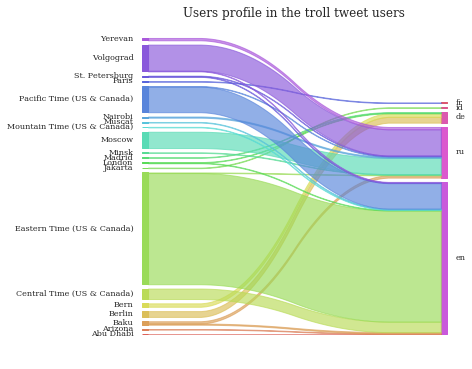

In [59]:
sankey.sankey(user_loc_lang['time_zone'],
             user_loc_lang['lang'],
             leftWeight = user_loc_lang['user_count'],
             rightWeight = user_loc_lang['user_count'],
             fontsize = 8)
plt.title("Users profile in the troll tweet users")

 Apparently, **English speaking users come from US, Canada & Arizona.** 
 
**Russian speaking users come from Moscow, Volgograd, Yerevan and Minsk.** 

#### All french speaking users are from Paris. 

## Twitter Accounts creation date

The created_at column in the users dataframe provides this information

In [60]:
# create a df
users['created_at'] = pd.to_datetime(users['created_at'])
users['created_at_date'] = pd.to_datetime(users['created_at'])

users['created_at_date'].head()

0   2009-01-07 04:38:02+00:00
1   2009-12-29 23:15:22+00:00
2   2011-02-04 06:38:45+00:00
3   2011-02-09 07:38:44+00:00
4   2011-12-29 11:31:09+00:00
Name: created_at_date, dtype: datetime64[ns, UTC]

Plot the Troll User Accounts Creation date

Text(0, 0.5, 'Count of accounts created')

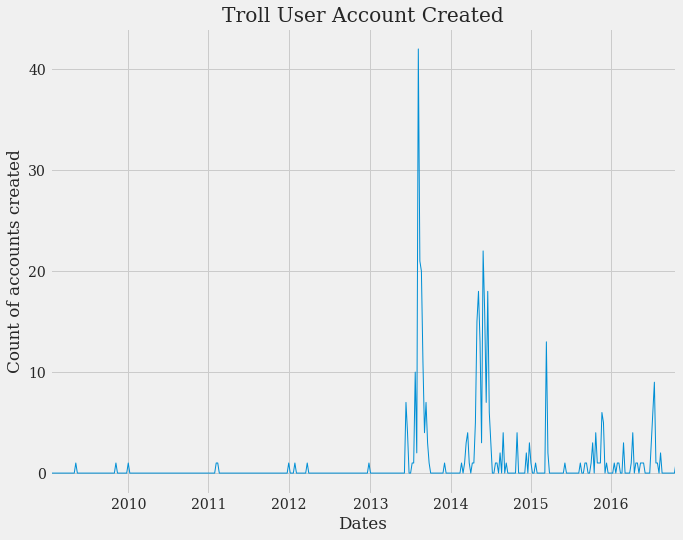

In [61]:
user_created = users.groupby('created_at_date')['id'].agg('count')

plt.style.use('fivethirtyeight')
user_created.resample('W', kind = 'period').sum().\
plot(linestyle = '-', figsize = (10,8), linewidth = 1)
title('Troll User Account Created')
xlabel('Dates')
ylabel('Count of accounts created')

### The most tweeted users



In [0]:
user_tweet_count =tweets.groupby('user_id')['text'].agg('count').reset_index()
user_tweet_count.rename(columns = {'text': 'Tweet_count'}, inplace = True)

In [63]:
# merge the df with the users data
user_tweet_count_df = user_tweet_count.merge(users,
                                            left_on = 'user_id',
                                            right_on = 'id')

user_tweet_count_df.head(10)

,user_id,Tweet_count,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count,created_at_date
0,1.871082e+07,31,1.871082e+07,near Utah Ave & Lighthouse an,Robby Delaware,304.0,11484.0,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",2009-01-07 04:38:02+00:00,17.0,670.0,13.0,2009-01-07 04:38:02+00:00
1,3.887576e+07,1,3.887576e+07,St-Petersburg,Olga,14.0,219.0,St. Petersburg,False,ru,Leecory,here i am~,2009-05-09 15:58:34+00:00,0.0,6.0,0.0,2009-05-09 15:58:34+00:00
2,8.758894e+07,3,8.758894e+07,NaN,Одинокий Джордж,1267.0,61735.0,Moscow,False,ru,anzgri,Никто.,2009-11-05 01:44:48+00:00,75.0,36.0,111.0,2009-11-05 01:44:48+00:00
3,1.003451e+08,66,1.003451e+08,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.0,31858.0,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,2009-12-29 23:15:22+00:00,2774.0,1055.0,35.0,2009-12-29 23:15:22+00:00
4,2.471657e+08,56,2.471657e+08,"Chicago, IL",B E C K S T E R✨,650.0,6742.0,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,2011-02-04 06:38:45+00:00,7273.0,896.0,30.0,2011-02-04 06:38:45+00:00
5,2.495389e+08,23,2.495389e+08,NaN,Chris Osborne,44.0,843.0,NaN,False,en,skatewake1994,NaN,2011-02-09 07:38:44+00:00,227.0,154.0,1.0,2011-02-09 07:38:44+00:00
6,4.496897e+08,7,4.496897e+08,NaN,Рамзан Кадыров,94773.0,10877.0,Moscow,False,ru,KadirovRussia,"Пародийный аккаунт. Озвучиваю то, что политика...",2011-12-29 11:31:09+00:00,0.0,7.0,691.0,2011-12-29 11:31:09+00:00
7,4.718689e+08,5,4.718689e+08,"Санкт-Петербург, Россия",Маргарита Саваж,23305.0,18401.0,Volgograd,False,ru,MargoSavazh,Честь имею. Нагло врать не умею.,2012-01-23 10:26:25+00:00,1480.0,8021.0,231.0,2012-01-23 10:26:25+00:00
8,5.356905e+08,1,5.356905e+08,NaN,LinaLuna,785.0,9394.0,Volgograd,False,ru,Lmarinays,НЛО,2012-03-24 20:41:43+00:00,627.0,202.0,3.0,2012-03-24 20:41:43+00:00
9,1.039581e+09,84,1.039581e+09,Amerika,Dark Nally,22.0,22603.0,Jakarta,False,id,darknally,uptodate news!!!!,2012-12-27 13:06:58+00:00,0.0,40.0,16.0,2012-12-27 13:06:58+00:00


Plot the top 10 tweeting Users

Text(0, 0.5, 'User Name')

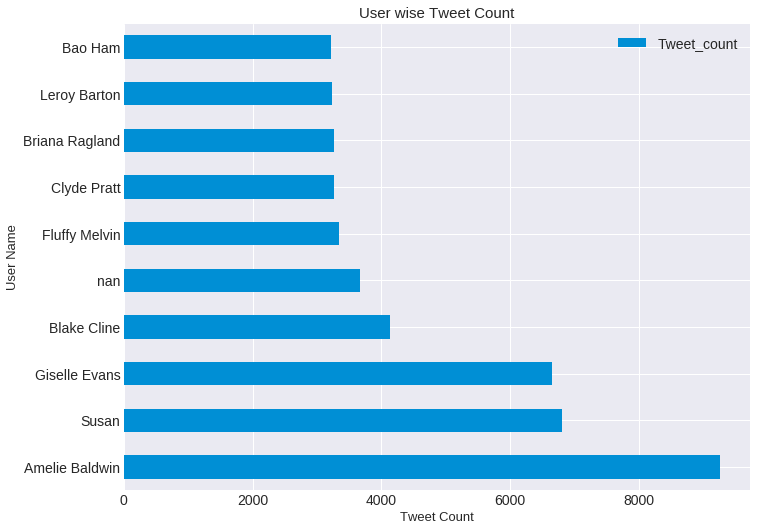

In [64]:
plt.style.use('seaborn-darkgrid')
user_tweet_count_df[['name', 'Tweet_count']].sort_values('Tweet_count', ascending = False)[:10].\
set_index('name').plot(kind = 'barh', figsize = (10,8))
title('User wise Tweet Count', fontsize = 15)
xlabel('Tweet Count', fontsize = 13)
ylabel('User Name', fontsize = 13)

### Is there a correlation between higher number of followers and larger number of tweets?

In [65]:
correl = user_tweet_count_df['Tweet_count'].corr(user_tweet_count_df['followers_count'])
print("{0:.2f}".format(correl))

-0.03


Text(6000, 80000, 'Correlation is: -0.03')

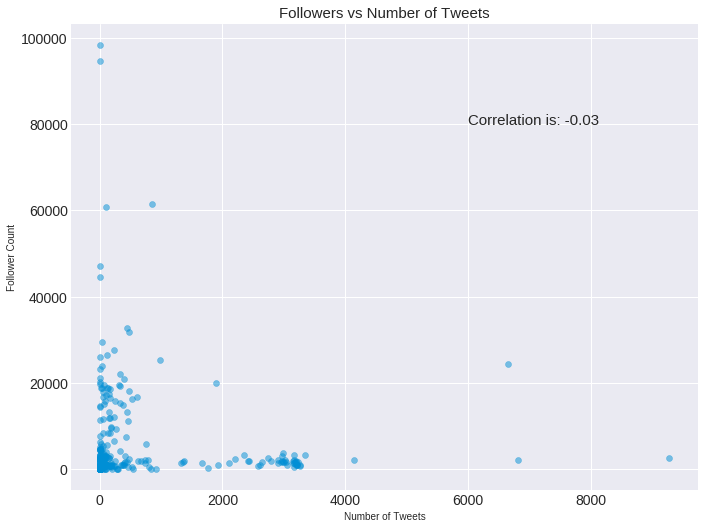

In [66]:
# Let's draw a scatterplot of the tweet count with the number of followers
fig = plt.figure(figsize = (10,8))
plt.style.use('seaborn-darkgrid')
plt.scatter(user_tweet_count_df['Tweet_count'], 
        user_tweet_count_df['followers_count'],
       marker = 'o',
       alpha = 0.5)
plt.title("Followers vs Number of Tweets", fontsize = 15)
plt.xlabel("Number of Tweets", fontsize = 10)
plt.ylabel("Follower Count", fontsize = 10)
plt.text(6000, 80000, s = "Correlation is: {0:.2f}".format(correl), fontsize = 15)

### No such  correlation exists.

 Apparently, most users have very low tweet counts but their followers range from very few to numerous
 
 ## Users' registered Languages

In [67]:
user_tweet_count_df['lang'].value_counts()

en    273
ru     90
de     18
es      1
id      1
fr      1
Name: lang, dtype: int64

### English is the most common language, followed by Russian and German

## The most influential Users

In [68]:
user_tweet_count_df[['name','lang','followers_count']].sort_values('followers_count', ascending = False)[:10]

,name,lang,followers_count
292,Максим Дементьев,ru,98412.0
6,Рамзан Кадыров,ru,94773.0
295,Jenna Abrams,en,61609.0
288,New York City Today,en,60897.0
281,Мюсли Лаврова,ru,47080.0
146,Холодная Война 2.0,ru,44470.0
234,Politweecs,en,32846.0
287,Washington Online,en,31729.0
297,Pigeon Today,en,29524.0
189,New Orleans Online,en,27745.0


### Let's save the files as datasets 

In [0]:
user_mention_clean_df.to_csv('User_Mentions.csv')
user_hashtag_group.to_csv('User_Hashtags.csv')
user_tweet_df.to_csv('User_Tweets.csv')

## Machine Learning Applications


### Keras Model

#### Load the Libraries

In [70]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Let's create a simple Keras DF

In [0]:
def my_analyzer(lot, grams=1):
    if grams < 1:
        return None
    lot = remove_retweet(lot)
    lot = remove_hashtags(lot)
    lot = remove_links(lot)
    lot = remove_extraneous(lot)
    lot = remove_mentions(lot)
    tokens = lot.split(" ")
    newwords = []
    for word in tokens:
        if len(word) > 0 and word not in stop_words:
            newwords.append(word)
    if len(newwords) < grams:
        return ['notext']
    if grams == 1:
        return newwords
    ngrams = []
    for i, words in enumerate(newwords):
        this_gram = []
        if i < len(newwords)- grams + 1:
            for j in range(grams):
                this_gram.append(newwords[i+j])
            ngrams.append(tuple(this_gram))
    return(ngrams)

In [0]:

k_tweets = tweets.loc[:,('text','created_at')]
k_tweets['troll'] = 1

good_twts = df.loc[:,('text','created_at')]
good_twts['troll'] = 0

keras_df = pd.concat([k_tweets, good_twts])
keras_df.reset_index(inplace=True, drop=True)



Load sklearn  Count Vectorizer

### Create Train/test Split

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=my_analyzer, ngram_range=(1,3), binary=False, min_df=5, stop_words='english')

X = keras_df.loc[:,('text', 'created_at')]
y = keras_df.loc[:,'troll']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=None)
X_train, X_test1, y_train, y_test1 = train_test_split(X_train, y_train, test_size=0.5, random_state=None)
X_train, X_test2, y_train, y_test2 = train_test_split(X_train, y_train, test_size=0.5, random_state=None)
X_train, X_test3, y_train, y_test3 = train_test_split(X_train, y_train, test_size=0.5, random_state=None)

In [0]:
X_train_vec = vectorizer.fit_transform(X_train['text'])
X_test_vec = vectorizer.transform(X_test['text'])
X_test_vec1 = vectorizer.transform(X_test1['text'])
X_test_vec2 = vectorizer.transform(X_test2['text'])
X_test_vec3 = vectorizer.transform(X_test3['text'])




In [75]:
# Let's take a look at the train/test vec dimentions and model keras

print(X_train_vec.shape)
print(X_test_vec3.shape)

(37568, 7327)
(37568, 7327)


In [76]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

num_words = X_train_vec.shape[1]

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_words, input_dim=num_words, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model 

Using TensorFlow backend.


### Evaluate the model

In [77]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model2 = baseline_model()
history  = model2.fit(X_train_vec, y_train, validation_data=(X_test_vec3, y_test3), epochs=16, batch_size=10000, verbose=2, callbacks=[early_stopping])

scores = model2.evaluate(X_test_vec3, y_test3, verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 37568 samples, validate on 37568 samples
Epoch 1/16
 - 215s - loss: 0.6671 - acc: 0.6511 - val_loss: 0.4467 - val_acc: 0.7892
Epoch 2/16
 - 212s - loss: 0.3542 - acc: 0.8523 - val_loss: 0.4221 - val_acc: 0.7982
Epoch 3/16
 - 211s - loss: 0.2960 - acc: 0.8873 - val_loss: 0.4136 - val_acc: 0.8007
Epoch 4/16
 - 212s - loss: 0.2602 - acc: 0.9070 - val_loss: 0.4101 - val_acc: 0.8024
Epoch 5/16
 - 211s - loss: 0.2341 - acc: 0.9185 - val_loss: 0.4085 - val_acc: 0.8033
Epoch 6/16
 - 211s - loss: 0.2129 - acc: 0.9266 - val_loss: 0.4099 - val_acc: 0.8040
Epoch 7/16
 - 212s - loss: 0.1965 - acc: 0.9325 - val_loss: 0.4176 - val_acc: 0.8013
Epoch 8/16
 - 212s - loss: 0.1902 - acc: 0.9322 - val_loss: 0.4383 - val_acc: 0.7866
Epoch 9/16
 - 213s - loss: 0.1769 - acc: 0.9352 - val_loss: 0.4220 - val_acc: 0.8028
Epoch 10/16
 - 212s - loss: 0.1579 - acc: 0.9455 - val_loss: 0.42

In [84]:
model2.save("model.h5")

print(scores)
y_pred = model2.predict(X_test_vec3)



[0.4712483564445676, 0.798232538330494]


 ### Let's plot the Training and Validation Accuracies of the model

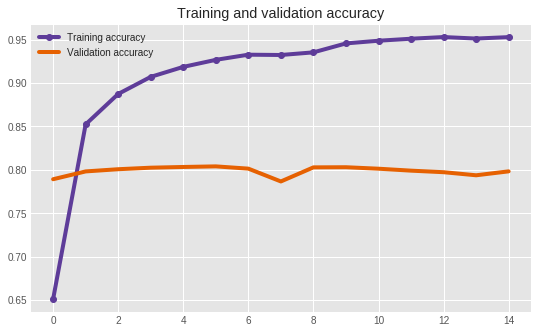

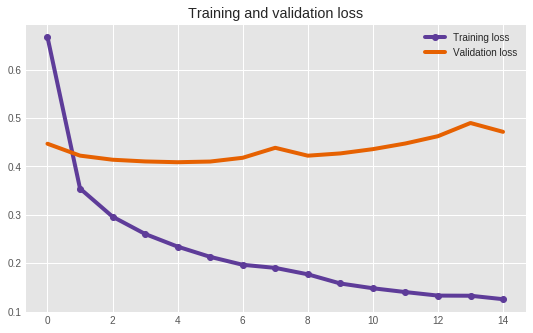

In [85]:
def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
      
plot_train_curve(history)      

In [0]:
y_pred = [int(np.round(y_pred[x])) for x in range(len(y_pred))]
#y_pred2 = [int(np.round(y_pred2[x])) for x in range(len(y_pred2))]

### Confusion Matrix

In [87]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test3, y_pred, labels=[0,1])
print(cm1)

from sklearn.metrics import classification_report
print(classification_report(y_test3,y_pred, target_names = ['Real','Troll']))

#cm2 = confusion_matrix(y_test2, y_pred2, labels=[0,1])
#print(cm2)

#print(classification_report(y_test2,y_pred2, target_names = ['Real','Troll']))

[[22484  2453]
 [ 5127  7504]]
              precision    recall  f1-score   support

        Real       0.81      0.90      0.86     24937
       Troll       0.75      0.59      0.66     12631

    accuracy                           0.80     37568
   macro avg       0.78      0.75      0.76     37568
weighted avg       0.79      0.80      0.79     37568

